# Fire up graphlab create

In [2]:
import graphlab

# Load some house sales data

In [3]:
sales = graphlab.SFrame('home_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to cbisho12@utk.edu and will expire on September 08, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1473784828.log


In [30]:
sales.show()

# Exploring the data for housing

In [5]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot",x="sqft_living",y="price")

# Create a simple regression model of sqft_living to price

In [34]:
train_data,test_data = sales.random_split(.8,seed=0)

# Build the regression model 

In [48]:
sqft_model= graphlab.linear_regression.create(train_data,target='price', features=['sqft_living'], validation_set=None )

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.034573     | 4349521.926170     | 262943.613754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [49]:
print test_data['price'].mean()

543054.042563


In [50]:
sqft_model.evaluate(test_data)

{'max_error': 4143550.8825285914, 'rmse': 255191.02870527367}

# Let's show what our predictions look like

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

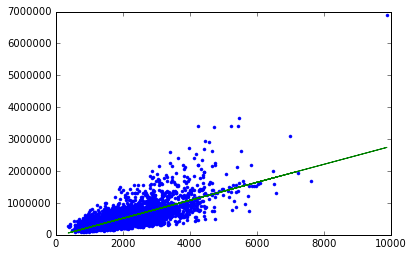

In [52]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'-')

In [53]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-47114.0206702,4923.34437753
sqft_living,None,281.957850166,2.16405465323


# Explore other features in the data

In [54]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [55]:
sales[my_features].show()

In [56]:
sales.show(view='BoxWhisker Plot',x='zipcode',y='price')

# Build a regression model with more features

In [57]:
my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.064374     | 3763208.270524     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [40]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [58]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4143550.8825285914, 'rmse': 255191.02870527367}
{'max_error': 3486584.509381928, 'rmse': 179542.43331269105}


# Apply learned models to predict prices of 3 houses

In [60]:
house1 = sales[sales['id']=='5309101200']

In [31]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [33]:
<img src="house-5309101200.jpg"

SyntaxError: invalid syntax (<ipython-input-33-e47438f6a3e9>, line 1)

In [61]:
print house1['price']

[620000, ... ]


In [62]:
print sqft_model.predict(house1)

[629584.8197281547]


In [16]:
print my_features_model.predict(house1)

[721350.0418406005]


## Prediction for a second, fancier house

In [17]:
house2 = sales[sales['id']=='1925069082']

In [18]:
print house2

+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_

In [20]:
print sqft_model.predict(house2)

[1263941.757688962]


In [21]:
print my_features_model.predict(house2)

[1470152.8408193423]


# Last House, super fancy

In [22]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [23]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

[13720897.590211386]


In [24]:
print sqft_model.predict(graphlab.SFrame(bill_gates))

[14106702.26604487]


In [63]:
quiz_data = sales[sales['zipcode'] == '98039']

In [64]:
print quiz_data['price'].mean()

2160606.6


In [29]:
 sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] <= 4000) ].show()

In [32]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [65]:
advanced_features_model = graphlab.linear_regression.create(train_data,target='price',features=advanced_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.060346     | 3469012.450663     | 154580.940735 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [66]:
print my_features_model.evaluate(test_data)

{'max_error': 3486584.509381928, 'rmse': 179542.43331269105}


In [67]:
print advanced_features_model.evaluate(test_data)

{'max_error': 3556849.413848093, 'rmse': 156831.11680191013}
